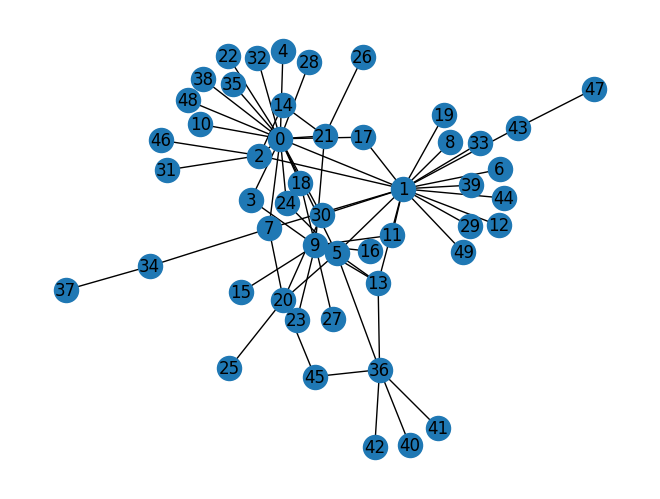

In [1]:
import networkx as nx
import random

random.seed(42)

g = nx.Graph(nx.scale_free_graph(50))
g.remove_edges_from(nx.selfloop_edges(g))

pos = nx.spring_layout(g)

nx.draw(
    g,
    pos=pos,
    with_labels=True,
)

In [2]:
import statistics

degrees = dict(g.degree)

degree_mean = statistics.mean(degrees.values())
degree_stdev = statistics.stdev(degrees.values())

hubs = [
    node
    for node, degree in degrees.items()
    if degree > degree_mean + degree_stdev
]
hubs

[0, 1, 5, 9]

In [3]:
closeness_centrality = nx.closeness_centrality(g)

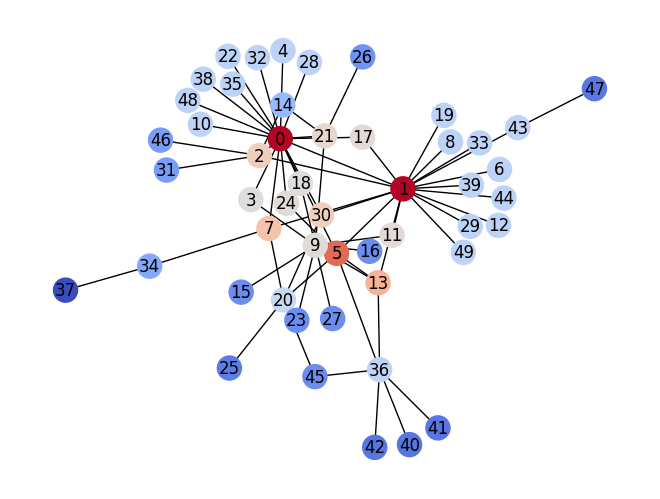

In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt

low, *_, high = sorted(closeness_centrality.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

nx.draw(g,
        pos=pos,
        nodelist=closeness_centrality,
        node_color=[mapper.to_rgba(i) 
                    for i in closeness_centrality.values()], 
        with_labels=True,
       )
plt.show()